 # House Price Prediction Using Linear Regression

In [12]:
import pandas as pd 
import numpy as np 
import scipy as sp 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

In [3]:
data= pd.read_csv("house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe(include=[np.number])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
pd.isnull(data)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

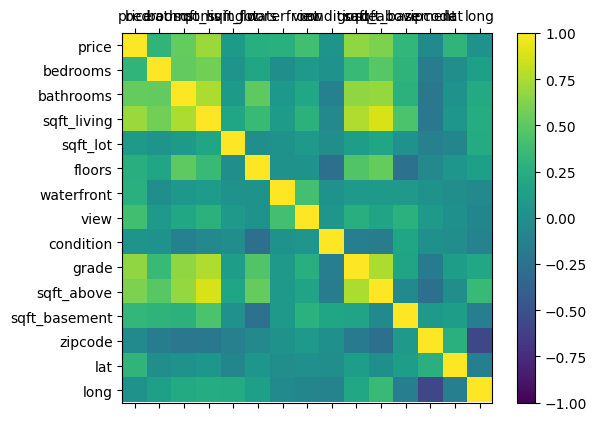

In [13]:
names=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','zipcode','lat','long']
df=data[names]
correlations= df.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,15,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [14]:
data.dtypes

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<Axes: xlabel='sqft_living', ylabel='price'>

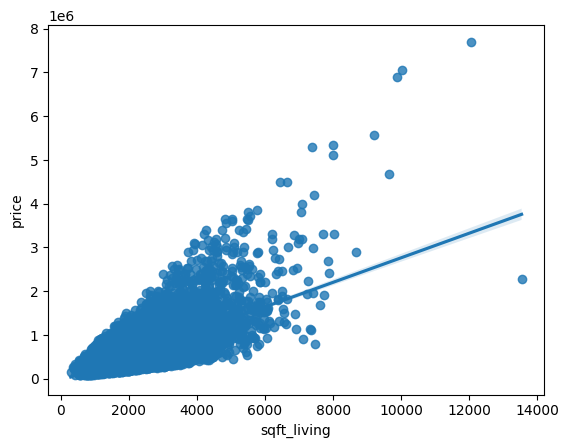

In [15]:
sns.regplot(x='sqft_living',y='price',data=data)

<Axes: xlabel='sqft_basement', ylabel='price'>

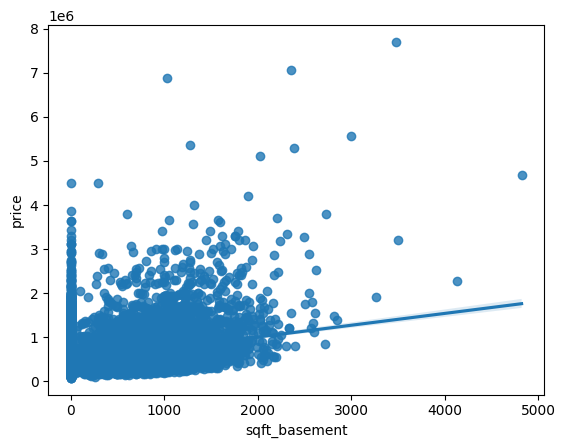

In [16]:
sns.regplot(x='sqft_basement',y='price',data=data)

<Axes: xlabel='sqft_above', ylabel='price'>

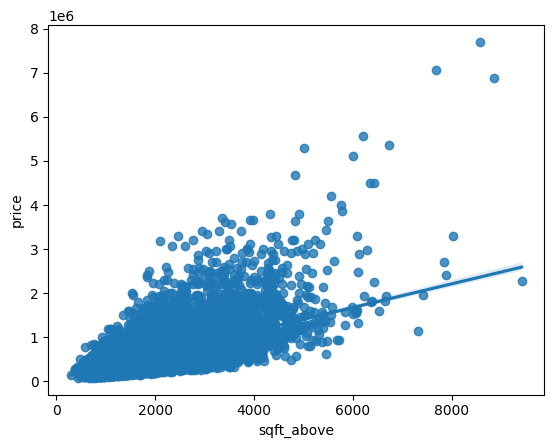

In [17]:
sns.regplot(x='sqft_above',y='price',data=data)

<Axes: xlabel='bedrooms', ylabel='price'>

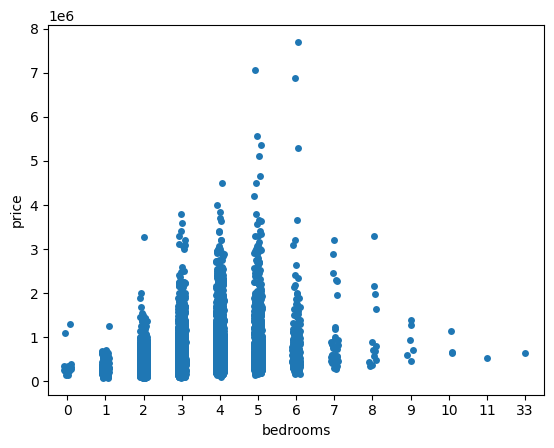

In [18]:
sns.stripplot(x='bedrooms', y='price',data=data)

<Axes: xlabel='bathrooms', ylabel='price'>

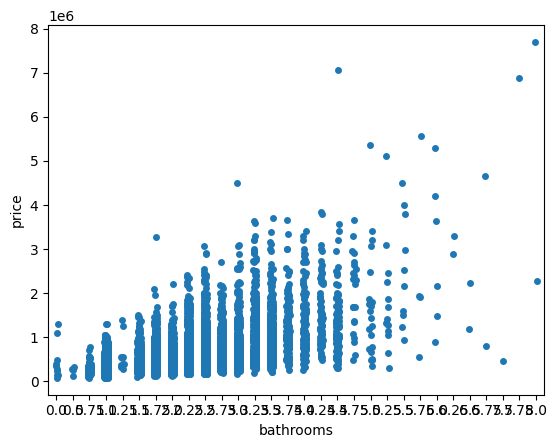

In [19]:
sns.stripplot(x='bathrooms', y='price',data=data, size=5)

<Axes: xlabel='grade', ylabel='price'>

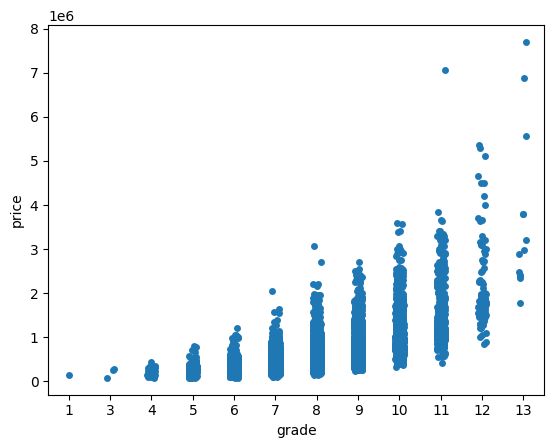

In [20]:
sns.stripplot(x='grade', y='price',data=data, size=5)

In [21]:
c=['bedrooms','bathrooms','sqft_living','sqft_above','grade']
df=data[c]

In [22]:
df=pd.get_dummies(df,columns=['grade'], drop_first=True)

In [23]:
y=data['price']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.8,random_state=42)

In [25]:
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_above,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
6325,3,1.75,1780,1780,False,False,False,False,False,False,True,False,False,False,False
13473,2,1.00,1000,800,False,False,False,True,False,False,False,False,False,False,False
17614,3,1.00,1080,990,False,False,False,True,False,False,False,False,False,False,False
16970,3,2.25,2090,1280,False,False,False,False,True,False,False,False,False,False,False
20868,2,2.50,1741,1446,False,False,False,False,False,True,False,False,False,False,False


In [26]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [27]:
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [-2.19444506e+04  5.95153699e+02  2.40397951e+02 -9.89622310e+01
  4.20887081e+04  4.77601913e+04  5.68782310e+04  7.83040545e+04
  1.05773721e+05  1.75012403e+05  3.18687520e+05  5.14018930e+05
  8.00876572e+05  1.28315688e+06  2.52355230e+06]


In [28]:
print("Mean Square Error value is : ",metrics.mean_squared_error(y_test, reg.predict(x_test)))

Mean Square Error value is :  60308617988.53384


In [29]:
print("The regression score is : ",reg.score(x_test,y_test))

The regression score is :  0.601072036240168


In [31]:
df=pd.get_dummies(data,columns=['waterfront','view','condition','grade','zipcode'], drop_first=True)

In [32]:
y=data['price']
df= df.drop(['date','id','price'],axis=1)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.6,random_state=42)

In [34]:
reg.fit(x_train,y_train)

LinearRegression()

In [35]:
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [-1.23325341e+04  2.76458405e+04  8.88028848e+01  2.17526455e-01
 -2.75717841e+04  6.75384922e+01  2.12543122e+01 -2.79122509e+02
  2.70251337e+01  1.93741186e+05 -2.14884564e+05  1.76510105e+01
 -6.15287604e-02  5.22487802e+05  9.92185758e+04  6.37194396e+04
  1.72562698e+05  3.08375086e+05  5.32857618e+04  4.92868280e+04
  7.74064731e+04  1.13266714e+05  3.98008359e+04 -2.37216731e+04
 -5.61253100e+04 -5.25770887e+04 -4.87620881e+04 -2.69844076e+04
  5.50470942e+04  1.77765706e+05  3.65898740e+05  7.70777220e+05
  1.74657574e+06  2.37087065e+04 -5.96670436e+03  7.04983891e+05
  2.72139386e+05  2.30887306e+05  2.23186521e+05  2.31933436e+05
  1.18385752e+05  6.81680123e+04  1.14920739e+05  9.09948958e+04
  7.47358593e+04 -4.96869750e+04  1.80815811e+05  1.81431797e+05
  5.50365696e+04  2.43676539e+05  2.35722794e+04  1.93553223e+04
 -6.53048431e+03  3.10696765e+05  1.39692783e+05  8.03342670e+04
  1.09606762e+06  4.86414180e+05  2.70215697e+04  1.82064824e+05
  2.05233

In [36]:
print("Mean Square Error value is : ",metrics.mean_squared_error(y_test, reg.predict(x_test)))

Mean Square Error value is :  25381940108.459568


In [37]:
print("The regression score is : ",reg.score(x_test,y_test))

The regression score is :  0.8302044200224286
